# ONLINE APP RESTAURANT RATING PREDICTION

The data from an online food app, which needs assistance in predicting the future success or failure of a business (restaurant), has been used in this case study. Such that they can choose whether to delete the restaurant from their app or keep it. They have provided information from 9551 eateries from across the world that are currently accessible on their app. It contains details about the restaurants, including the overall rating.

I am planning to develop a machine learning model that can forecast a restaurant's rating based on its attributes.

In the case study that follows, I'll go over the step-by-step process for developing a machine learning prediction model in such circumstances.


### The flow of the case study is as below:


The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model using streamlit

## Data description
 The business meaning of each column in the data is as below

* <b>Restaurant ID</b>: The id for each restaurant
*<b>Restaurant Name</b>: The brand/restaurant name
*<b>Country Code</b>: In which country the restaurant is operating
*<b>City</b>: In which city the restaurant is operating
*<b>Address</b>: What is the address of the restaurant
*<b>Locality</b>: What is the locality of the restaurant
*<b>Locality Verbose</b>: Detailed locality description
*<b>Longitude</b>: GPS longitude location
*<b>Latitude</b>: GPS latitude location
*<b>Cuisines</b>: Various type of food offered
*<b>Currency</b>: The business currency
*<b>Has Table booking</b>: Is advance table booking facility available?
*<b>Has Online delivery</b>: Does they take online food orders?
*<b>Is delivering now</b>: Is is open now?
*<b>Switch to order menu</b>: Whether switch to order menu is available?
*<b>Price range</b>: The price range of the restaurant
*<b>Votes</b>: The number of people who voted for the rating
*<b>Average Cost for two</b>: The typical cost for two people
*<b>Rating</b>: The final rating of the restaurant

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
import pandas as pd
import numpy as np 
RtData = pd.read_csv('Restaurant_Data.csv', encoding='latin')
print('Shape before deleting duplicate values:', RtData.shape)

# Removing duplicate rows if any
RtData=RtData.drop_duplicates()
print('Shape After deleting duplicate values:', RtData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
RtData.head(5)

Shape before deleting duplicate values: (9551, 19)
Shape After deleting duplicate values: (9551, 19)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [3]:
RtData.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,56.750546,41.467058,11.007935,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,1.000000,77.191964,28.570469,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,1.000000,77.282006,28.642758,2.000000,131.000000,700.000000,3.700000
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000


In [4]:
#Selecting the restaurants located in India 
RtData = RtData[(RtData.Currency == "Indian Rupees(Rs.)")]

In [5]:
#Removing the data where Average cost is 0
RtData = RtData.loc[(RtData['Average Cost for two'] > 0)]

In [6]:
RtData.shape

(8643, 19)

In [7]:
RtData.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Price range,Votes,Average Cost for two,Rating
count,8.643000e+03,8643.0,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000
mean,8.655738e+06,1.0,72.867896,26.426365,1.722434,137.270045,624.019438,2.769374
std,8.960763e+06,0.0,17.991596,6.968468,0.852669,428.257651,595.646258,1.105049
min,5.300000e+01,1.0,0.000000,0.000000,1.000000,0.000000,50.000000,1.000000
25%,3.007115e+05,1.0,77.098791,28.492260,1.000000,4.000000,300.000000,2.100000
50%,2.100861e+06,1.0,77.203351,28.569906,2.000000,24.000000,450.000000,3.100000
75%,1.836121e+07,1.0,77.285065,28.637950,2.000000,100.000000,700.000000,3.600000
max,1.850065e+07,1.0,91.806493,35.000000,4.000000,10934.000000,8000.000000,4.900000


## Defining the problem statement:
#### Create a Predictive model which can predict the future Rating of a restaurant

* <b>Target Variable</b>: Rating
* <b>Predictors</b>: location, menu, cost etc.
    
* Rating=1 Worst
* Rating=5 Best

## Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

## Looking at the distribution of Target variable

<AxesSubplot:>

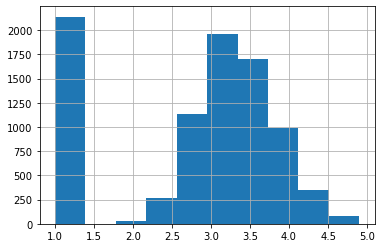

In [8]:
%matplotlib inline
#Creating Bar chart as the Target Variable is Continuous
RtData['Rating'].hist()


The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

## Basic Data Exploration

In [9]:
#Looking at the summarized information of the data
RtData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8643 entries, 624 to 9275
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8643 non-null   int64  
 1   Restaurant Name       8643 non-null   object 
 2   Country Code          8643 non-null   int64  
 3   City                  8643 non-null   object 
 4   Address               8643 non-null   object 
 5   Locality              8643 non-null   object 
 6   Locality Verbose      8643 non-null   object 
 7   Longitude             8643 non-null   float64
 8   Latitude              8643 non-null   float64
 9   Cuisines              8643 non-null   object 
 10  Currency              8643 non-null   object 
 11  Has Table booking     8643 non-null   object 
 12  Has Online delivery   8643 non-null   object 
 13  Is delivering now     8643 non-null   object 
 14  Switch to order menu  8643 non-null   object 
 15  Price range        

In [10]:
#Looking at the descriptive statistics of the data
RtData.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
count,8.643000e+03,8643,8643.0,8643,8643,8643,8643,8643.000000,8643.000000,8643,8643,8643,8643,8643,8643,8643.000000,8643.000000,8643.000000,8643.000000
unique,NaN,6595,NaN,43,8017,783,840,NaN,NaN,1389,1,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8643,7532,6220,8609,8643,NaN,NaN,NaN,NaN
mean,8.655738e+06,NaN,1.0,NaN,NaN,NaN,NaN,72.867896,26.426365,NaN,NaN,NaN,NaN,NaN,NaN,1.722434,137.270045,624.019438,2.769374
std,8.960763e+06,NaN,0.0,NaN,NaN,NaN,NaN,17.991596,6.968468,NaN,NaN,NaN,NaN,NaN,NaN,0.852669,428.257651,595.646258,1.105049
min,5.300000e+01,NaN,1.0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,50.000000,1.000000
25%,3.007115e+05,NaN,1.0,NaN,NaN,NaN,NaN,77.098791,28.492260,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,300.000000,2.100000
50%,2.100861e+06,NaN,1.0,NaN,NaN,NaN,NaN,77.203351,28.569906,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,24.000000,450.000000,3.100000
75%,1.836121e+07,NaN,1.0,NaN,NaN,NaN,NaN,77.285065,28.637950,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,100.000000,700.000000,3.600000


In [11]:
# Finging unique values for each column
# T0 understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
RtData.nunique()

Restaurant ID           8643
Restaurant Name         6595
Country Code               1
City                      43
Address                 8017
Locality                 783
Locality Verbose         840
Longitude               7224
Latitude                7784
Cuisines                1389
Currency                   1
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                    871
Average Cost for two      78
Rating                    33
dtype: int64

## Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

* Restaurant ID: Qualitative. Rejected.
* Restaurant Name: Qualitative. Rejected.
* Country Code: Categorical. Selected.
* City: Categorical. Rejected. Too many unique levels, hence it will cause high dimensionality.
* Address: Qualitative. Rejected.
* Locality: Qualitative. Rejected.
* Locality Verbose: Qualitative. Rejected.
* Longitude: Continuous. Selected. This represents the location of restaurant
* Latitude: Continuous. Selected. This represents the location of restaurant
* Cuisines: Qualitative. Rejected.Too many unique levels, hence it will cause high dimensionality.
* Currency: Categorical. Selected.
* Has Table booking: Categorical. Selected.
* Has Online delivery: Categorical. Selected.
* Is delivering now: Categorical. Selected.
* Switch to order menu: Categorical. Selected.
* Price range: Categorical. Selected.
* Votes: Continuous. Selected.
* Average Cost for two: Continuous. Selected.
* Rating: Continuous. Selected. This is the Target Variable!

## Removing useless columns from the data


Dates, addresses, and other qualitative columns such as these cannot be used directly for machine learning. As a result, each row has a unique string value, making it impossible for machine learning algorithms to learn anything from them. Simply put, such columns cannot be used to derive any general rules.

However, we are able to extract some data from these columns that can be applied to ML. For example, we can extract the month, week, quarter, etc. from a date column to create a category feature but it will not be that useful for this project.

Similarly, we can extract certain repetitious data from addresses, such as zip codes, location, etc., but if the number of unique values is too high (more than 50), it causes problems for the ML algorithm later on as the data dimensionality rises while converting such columns to dummy variables.

The "Cuisines" column in this set of data cannot be used directly because it will produce 1825 dummy variables! so, removing that as well.



In [12]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Restaurant ID', 'Restaurant Name','City','Address',
                  'Locality', 'Locality Verbose','Cuisines','Country Code', 'Currency','Switch to order menu']
RtData = RtData.drop(UselessColumns,axis=1)
RtData.head()

,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes,Average Cost for two,Rating
624,78.011544,27.161661,No,No,No,3,140,850,3.9
625,0.000000,0.000000,No,No,No,2,71,700,3.5
626,78.011608,27.160832,No,No,No,2,94,500,3.6
627,77.998092,27.195928,No,No,No,2,87,400,4.0
628,78.007553,27.201725,No,No,No,3,177,1000,4.2


In [13]:
RtData.describe()

,Longitude,Latitude,Price range,Votes,Average Cost for two,Rating
count,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000
mean,72.867896,26.426365,1.722434,137.270045,624.019438,2.769374
std,17.991596,6.968468,0.852669,428.257651,595.646258,1.105049
min,0.000000,0.000000,1.000000,0.000000,50.000000,1.000000
25%,77.098791,28.492260,1.000000,4.000000,300.000000,2.100000
50%,77.203351,28.569906,2.000000,24.000000,450.000000,3.100000
75%,77.285065,28.637950,2.000000,100.000000,700.000000,3.600000
max,91.806493,35.000000,4.000000,10934.000000,8000.000000,4.900000


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

## Visualizing the distribution of all the Categorical Predictor variables in the data using bar plots

Categorical Predictors: 'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu','Price range'

We use bar charts to see how the data is distributed for these categorical columns.

In [14]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# defining my own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt 
    
    #Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of:' + str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

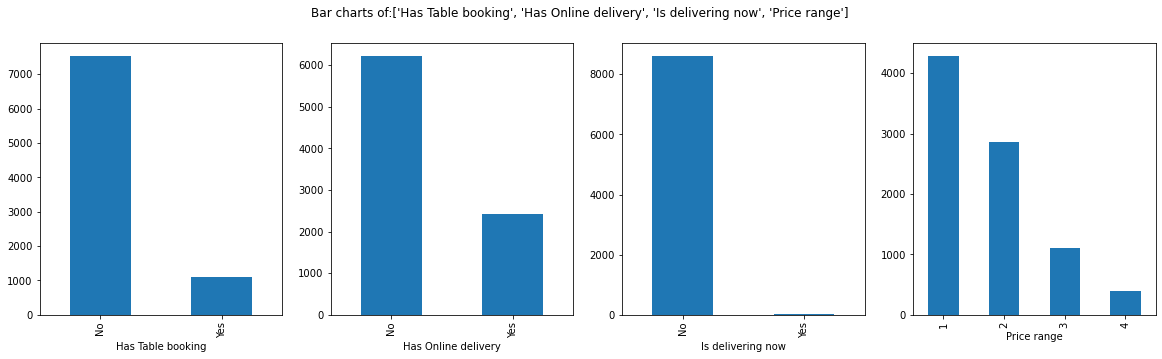

In [15]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=RtData, colsToPlot=['Has Table booking', 'Has Online delivery', 'Is delivering now','Price range'])

In this data, "Country Code", "Currency", "is delivering now" and "Switch to order menu" are too skewed. There is just one bar which is dominating and other categories have very less rows or there is just one value only. Such columns are not correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.

Selected Categorical Variables: Only three categorical variables are selected for further analysis.

'Has Table booking', 'Has Online delivery', 'Price range'

## Visualizing distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, There are four continuous predictor variables ''Longitude', 'Latitude','Votes', and 'Average Cost for two'

array([[<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'Average Cost for two'}>]],
      dtype=object)

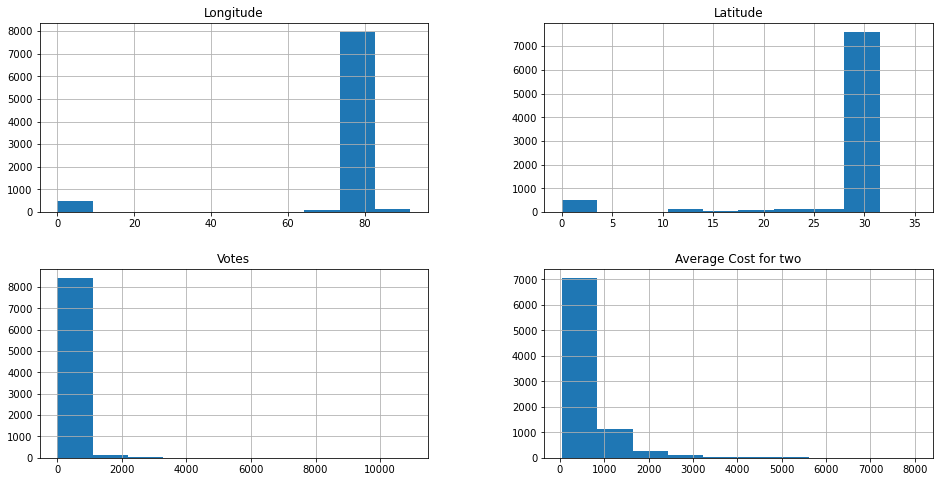

In [16]:
# Plotting histograms of multiple columns together
RtData.hist(['Longitude', 'Latitude', 
                 'Votes', 'Average Cost for two'], figsize=(16,8))

## Histogram Interpretation:

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

* Longitude : Selected. The distribution is good.
* Latitude: Selected. The distribution is good.
* Average Cost for two: Selected. Outliers seen beyond 300000, need to treat them.
* Votes: Selected. Outliers seen beyond 4000, need to treat them.

## Outliers

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Replacing outliers for 'Votes'

In [17]:
#Finding nearest values to 4000 mark 
RtData['Votes'][RtData['Votes']<4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
6102       0
6099       0
6098       0
6091       0
5427       0
Name: Votes, Length: 8624, dtype: int64

In [18]:
#Above result shows the nearest logical value is 3986, hence, replacing any value above 4000 with it.
# Replacing outliers with nearest possibe value
RtData['Votes'][RtData['Votes']>4000] =3986


### Replacing outliers for 'Average Cost for two'

In [19]:
# Finding nearest values to 50000 mark
RtData['Average Cost for two'][RtData['Average Cost for two']<50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7499    6000
7538    6000
        ... 
5577      50
7775      50
7808      50
7830      50
7418      50
Name: Average Cost for two, Length: 8643, dtype: int64

In [20]:
#Above result shows the nearest logical value is 8000, hence, replacing any value above 50000 with it.
## Replacing outliers with nearest possibe value
RtData['Average Cost for two'][RtData['Average Cost for two']>50000] = 8000

## Visualizing distribution after outlier treatment

The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'Average Cost for two'}>]],
      dtype=object)

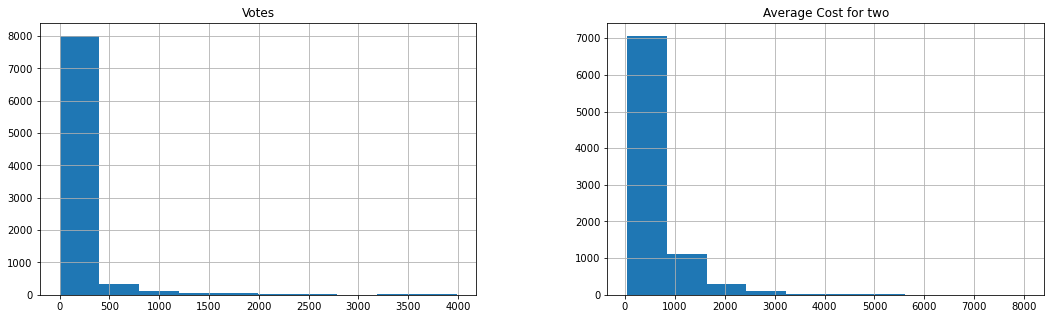

In [21]:
RtData.hist(['Votes', 'Average Cost for two'], figsize=(18,5))

## Missing values treatment

In [22]:
# Finding how many missing values are there for each column
RtData.isnull().sum()

Longitude               0
Latitude                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
dtype: int64

No missing values in this data.

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

In this case study the Target variable is Continuous, hence below two scenarios will be present

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts

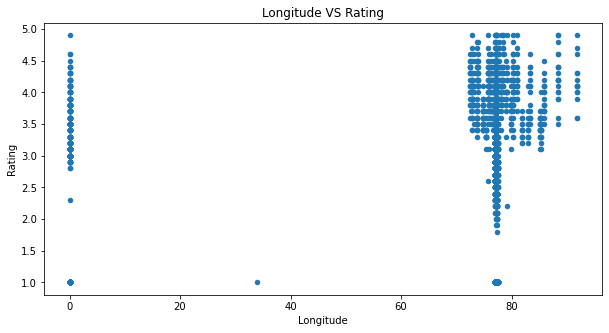

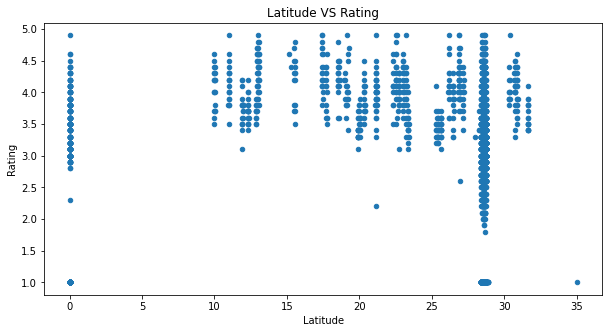

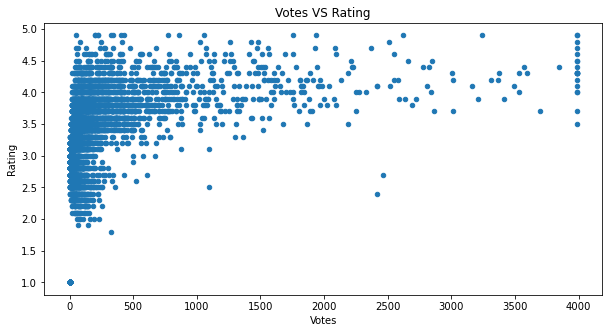

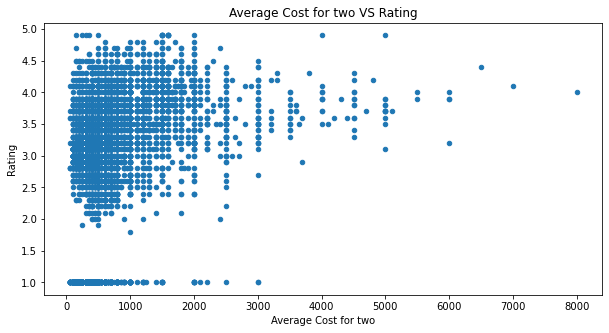

In [23]:
ContinuousCols=['Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    RtData.plot.scatter(x=predictor, y='Rating', figsize=(10,5), title=predictor+" VS "+ 'Rating')

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [24]:
# Calculating correlation matrix
ContinuousCols=['Rating','Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Creating the correlation matrix
CorrelationData=RtData[ContinuousCols].corr()
CorrelationData

,Rating,Longitude,Latitude,Votes,Average Cost for two
Rating,1.000000,0.161800,0.065156,0.358131,0.366275
Longitude,0.161800,1.000000,0.926590,0.076411,0.059605
Latitude,0.065156,0.926590,1.000000,-0.035178,0.017787
Votes,0.358131,0.076411,-0.035178,1.000000,0.314376
Average Cost for two,0.366275,0.059605,0.017787,0.314376,1.000000


In [25]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reducing the 0.5 threshold if no variable is selected like in this case
CorrelationData['Rating'][abs(CorrelationData['Rating']) > 0.3 ]


Rating                  1.000000
Votes                   0.358131
Average Cost for two    0.366275
Name: Rating, dtype: float64

Final selected Continuous columns:

'Votes', 'Average Cost for two'

# Relationship exploration: Categorical Vs Continuous -- Box Plots


When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

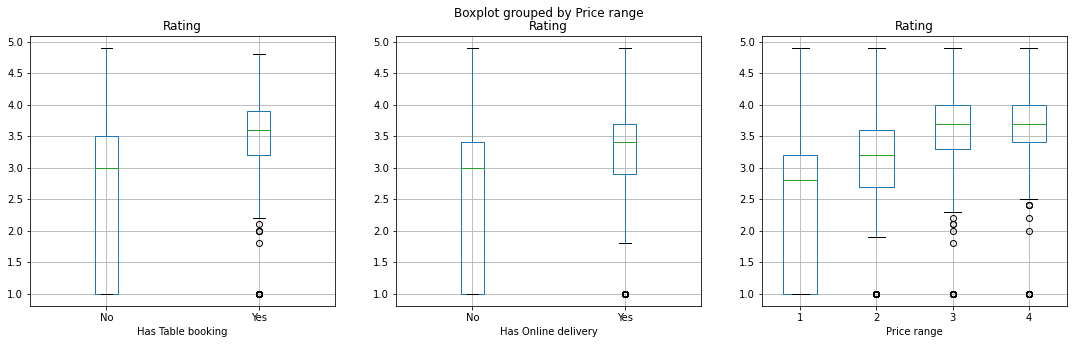

In [26]:
# Box plots for Categorical Target Variable "Rating" and continuous predictors
CategoricalColsList=['Has Table booking', 'Has Online delivery', 'Price range']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Rating"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    RtData.boxplot(column='Rating', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In this data, all three categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test¶

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
ANOVA Test result: Probability of H0 being true

In [27]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [28]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Has Table booking', 'Has Online delivery', 'Price range']
FunctionAnova(inpData=RtData, 
              TargetVariable='Rating', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Has Table booking is correlated with Rating | P-Value: 1.0038500766899416e-107
Has Online delivery is correlated with Rating | P-Value: 3.4341981048863214e-164
Price range is correlated with Rating | P-Value: 0.0


['Has Table booking', 'Has Online delivery', 'Price range']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

Final selected Categorical columns:

'Has Table booking', 'Has Online delivery', 'Price range'

# Selecting final predictors for Machine Learning

Based on the above tests, selecting the final columns for machine learning

In [29]:
SelectedColumns=['Votes','Average Cost for two','Has Table booking',
                 'Has Online delivery','Price range']

# Selecting final columns
DataForML=RtData[SelectedColumns]
DataForML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
624,140,850,No,No,3
625,71,700,No,No,2
626,94,500,No,No,2
627,87,400,No,No,2
628,177,1000,No,No,3


## Data Pre-processing for Machine Learning

In this data there is no Ordinal categorical variable.

## Converting the binary nominal variable to numeric using 1/0 mapping

In [30]:
# Converting the binary nominal variable sex to numeric
DataForML['Has Table booking'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Has Online delivery'].replace({'Yes':1, 'No':0}, inplace=True)

## Converting the nominal variable to numeric using get_dummies()

In [31]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Rating']=RtData['Rating']

# Printing sample rows
DataForML_Numeric.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating
624,140,850,0,0,3,3.9
625,71,700,0,0,2,3.5
626,94,500,0,0,2,3.6
627,87,400,0,0,2,4.0
628,177,1000,0,0,3,4.2


# Machine Learning: Splitting the data into Training and Testing sample

Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [32]:
# Printing all the column names for our reference
DataForML_Numeric.columns


Index(['Votes', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Rating'],
      dtype='object')

In [33]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'
Predictors=['Votes', 'Average Cost for two', 'Has Table booking',
           'Has Online delivery', 'Price range']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Multiple Linear Regression

In [34]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.2822477862429039

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.9              3.0
1     3.7              3.0
2     1.0              2.0
3     1.0              3.0
4     3.5              3.0
Mean Accuracy on test data: 54.27566840471535
Median Accuracy on test data: 73.17073170731707

Accuracy values for 10-fold Cross Validation:
 [63.29631315 55.34985851 65.91701358 54.61968483 61.68027359 28.73432509
 54.74405807 54.04180231 39.11057895 45.93544349]

Final Average Accuracy of the model: 52.34


## Decision Trees

DecisionTreeRegressor(max_depth=6)
R2 Value: 0.9141248692925272

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.9              3.0
1     3.7              3.0
2     1.0              1.0
3     1.0              1.0
4     3.5              3.0
Mean Accuracy on test data: 91.8409214775786
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [91.95971012 92.92280961 92.51311639 93.48579176 93.36576699 95.2695392
 93.34562376 93.75536053 93.57415112 92.68280194]

Final Average Accuracy of the model: 93.29


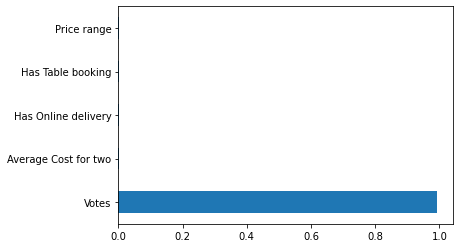

In [35]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

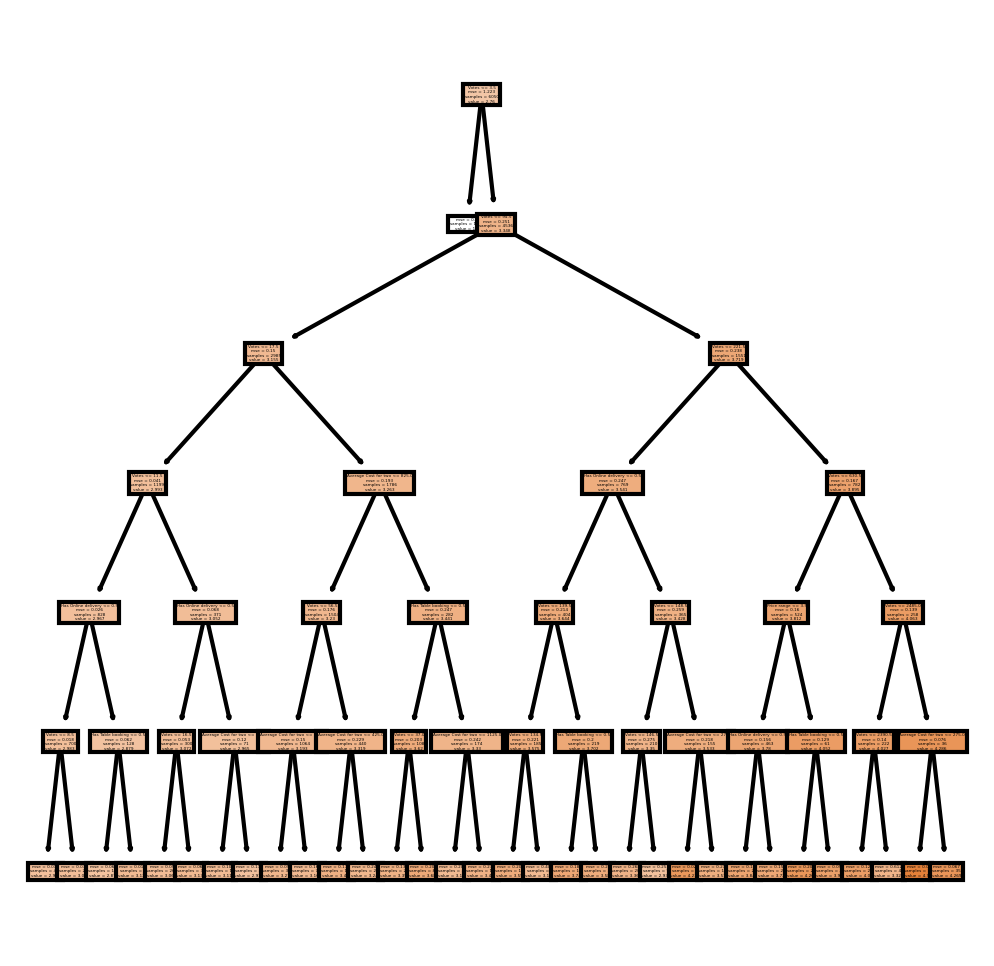

In [36]:
#Plotting the Decision Tree
from sklearn import tree
import matplotlib.pyplot as plt


# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(RegModel,feature_names=Predictors,class_names=TargetVariable,filled = True);


It is hard to visualize the decision tree as it is pretty huge.

## Random Forest

RandomForestRegressor(max_depth=2, n_estimators=400)
R2 Value: 0.8943867721024563

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.9              3.0
1     3.7              3.0
2     1.0              1.0
3     1.0              1.0
4     3.5              4.0
Mean Accuracy on test data: 91.61895662647301
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [90.97725832 92.06985756 91.66206944 92.7406027  92.68782668 94.52208395
 92.48665071 92.75477037 92.6387014  91.90550426]

Final Average Accuracy of the model: 92.44


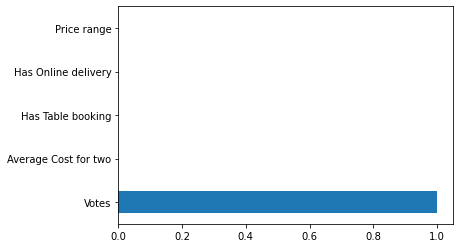

In [37]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## XGBoost Model

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', predictor=None,
             random_state=None, reg_alpha=None, ...)
R2 Value: 0.9250152884865178

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.9              3.0
1     3.7              3.0
2     1.0              1.0
3     1.0              1.0
4     3.5              3.0
Mean Accur

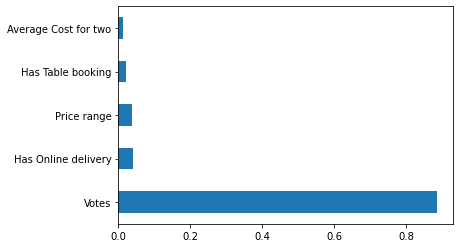

In [38]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,learning_rate=0.1, verbosity = 0, silent=True, n_estimators=1000, objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing "XGBoost Algorithm" as the final model for predicting the ratings since it has highest accuracy and it also tries to utilize other features.Further, I have deployed this model by creating a streamlit application which has been put in a seperate file.

Streamlit is an open source app framework in Python language. It helps us create web apps for data science and machine learning projects.

